<!--
Pavel Prochazka 
pavel@prochazka.info
v0.2.0 11.12.2016
-->

# From Network Information Flow To Wireless Network Coding

In this section, the signal space interaction will be considered instead of pure network information flow as it was discussed so far. Instead directly available data in relay and destinations, <em>modulation and demodulation</em> are considered as a bridge between integer valued network data and complex valued signal space. The proposed modulator design in sources (that is a mapping  $\mathbb{N}\to \mathbb{C}$) is going to be justified here. We also touch some specific properties of the WNC demodulator in relay (that is a mapping  $\mathbb{C}\to \mathbb{N}$) that are different compared to the conventional demodulator known from point to point communication.

In [1]:
# Initialization
%matplotlib inline
import numpy as np 
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Signal Space System Model

Considering again the source data $d_A, d_B$, the complex valued source modulated symbols are given as $s_A = \mathcal{M}_A(d_A)$ and $s_B = \mathcal{M}_B(d_B)$, where $\mathcal{M}_A,\mathcal{M}_B$ are signal space mappers in sources. 

In the MAC stage, the relay recieves the observation $x^{\prime}_R = h_{AR} s_A + h_{BR} s_B + w_R^{\prime}$, that is efficiently $x_R = s_A + h s_B + w_R$ with $h=h_{BR}h_{AR}^{-1}$, destination A $z_A = h_{BA}  s_B + w_{D_A}^{MAC}$ and destination B $z_B = h_{AB}  s_A + w_{D_B}^{MAC}$, where $h_\star$ is complex valued flat fading of corresponding link and $w_\star$ is zero mean AWGN noise with complex variance $\sigma^2_{w_\star}$ for all links. 

In the BC phase, the relay evaluates the network function $d_R = f(\hat{d}_A,\hat{d}_B)$ as in the previous section and modulates its data as  $s_R = \mathcal{M}_R(d_R).$ The destinations then recieve $y_A = h_{RA}  s_R + w_{D_A}^{BC}$ $y_B = h_{RB}  s_R + w_{D_B}^{BC}$ with analogous notation to MAC stage. 

All of the signal space mappers are constrained to have unit power per symbol.

Within this section, we assume a simplifying assumption $\sigma_{w*}^2 \to 0$ for all links. Interstignly, even this noise-less case does not guarantee error-less communication as in the previous chapter. It is sufficient to demonstrate a basic insight to wireless network coding and on top of that also the proposed constellation design. The noisy case can be found in the next section. 

## Wireless Network Coding Paradigm

Understanding the wireless extension of the network coding paradigm stands for a necessary step to understand the motivation of the proposed constellation design. As in the previous section, we start with $N_b=N$ that is only the basic link. 

The algorithm for constellation design can be found in [1]. The point of interest is only sources to relay link for now, because all other links are perfect with know non-zero flat fading coefficient. Therefore the data of interest are directly available in the noise-less case as in the previous section (proper demodulation methods are sheduled in the next section). Let us have a look how the proposed constellations in sources and the corresponding received relay constellation look like:

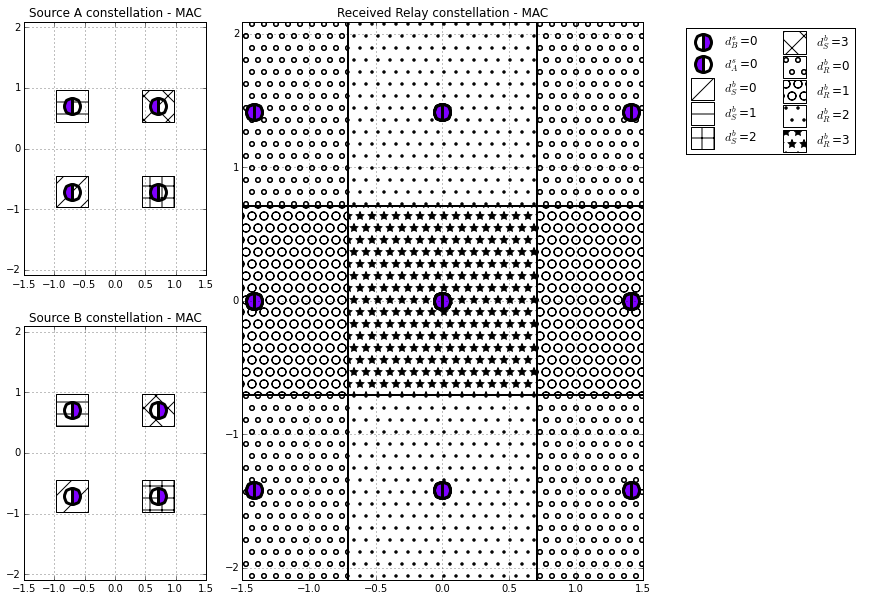

In [2]:
# Visualization of the Constellation desing
from Constellation_Design_lib import draw_Constellations_S2R
Nb = 2
Ns = 0
h = 1.
draw_Constellations_S2R(Nb, Ns, h)

The source constellations recognize two streams - basic and superposed one. Since we have $N_s=0$ in our example, no information is passed through the superposed stream (superposed bits are denoted by color). The bit mapping in basic streams is denoted by hatches. The superscript $S$ in lengend is shotcut for sources $A$ and $B$.

The received constellation in relay is composed only from <em>basic stream</em> bits.   <font color="red" bold>The basic stream indexing stands for the crux of the wireless network coding</font>. The wireless medium (sum in the signal space domain) naturally enable network operation. For instance, one can see that $$0 = \mathcal{M}_A(0)+\mathcal{M}_B(3) = \mathcal{M}_A(3)+\mathcal{M}_B(0) =  \mathcal{M}_A(1)+\mathcal{M}_B(2) = \mathcal{M}_A(2)+\mathcal{M}_B(1).$$
This identity refers to the network function $d_A^b\oplus d_B^b$ which indeed gives
$$3 = 2\oplus 1 = 1\oplus 2 = 3\oplus 0 = 0\oplus 3.$$ 
Therefore relay index $3$ is mapped to signal space $0$ in this case. One can ensure that all of the received constellation points referring to multiple pairs ($d_A, d_B$) can be unambiguosly indexed network index as:

In [3]:
# Checking sum of signal space points versus corresponding mapping
from Constellation_Design_lib import unique_complex, const_design_XOR
h = 1. # relative fading
(sA_const, sB_const, basic_part, superposed_part, relay_const, alpha) = \
            const_design_XOR(Nb, Ns, h)
un_const = unique_complex(relay_const) # make unique points:
print '[Relay basic indecis] : Corresponing received signal space point in relay'
for c in un_const[0]: # assign the basic stream indecis in the relay received constellation
    print [iA^iB for iA in range(2**Nb) for iB in range(2**Nb) \
          if np.abs(c-sA_const[iA]-h*sB_const[iB]) < 1e-5] , ':',c

[Relay basic indecis] : Corresponing received signal space point in relay
[0] : (-1.41421356237-1.41421356237j)
[1, 1] : (-1.41421356237+0j)
[2, 2] : -1.41421356237j
[3, 3, 3, 3] : 0j
[0] : (-1.41421356237+1.41421356237j)
[2, 2] : 1.41421356237j
[0] : (1.41421356237-1.41421356237j)
[1, 1] : (1.41421356237+0j)
[0] : (1.41421356237+1.41421356237j)


We can also unwrap the collocated points in the received relay constellation by slight mutual rotation of the source constellations to visualize the many to one mapping in relay.

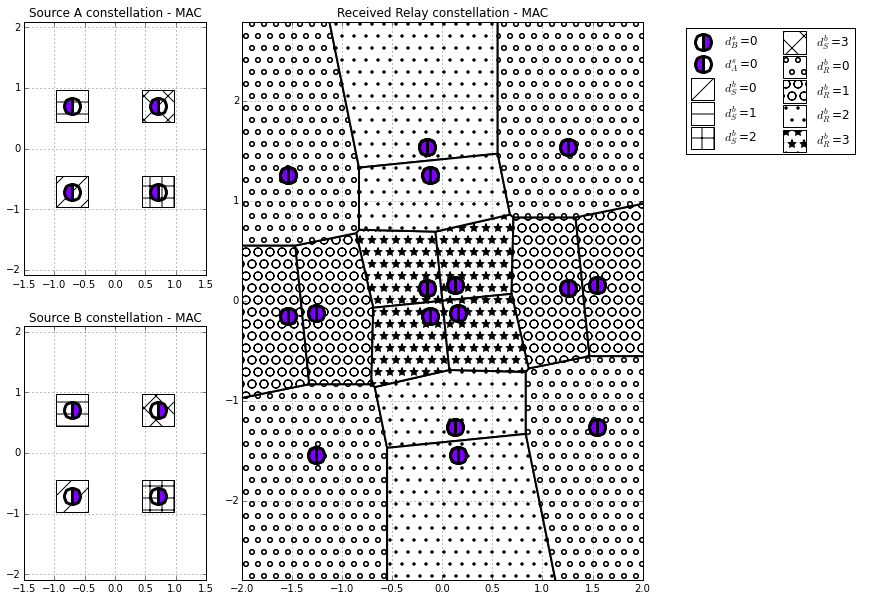

In [4]:
h = np.exp(1j*0.2) # Relative rotation
draw_Constellations_S2R(Nb, Ns, h)

The aforementioned property allowing the unambiguous indexing can be formally written in terms of exclusivity of the network function. It means that all source data resulting into the overllaping points in the received constellation must refer to the <em>same</em> network data. In the other words, 
$$
d_A^{(1)} \oplus d_B^{(1)} \neq d_A^{(2)} \oplus d_B^{(2)} 
\to  \mathcal{M}_A\left(d_A^{(1)}\right) + h \mathcal{M}_B\left(d_B^{(1)}\right) \neq  \mathcal{M}_A\left(d_A^{(2)}\right) + h \mathcal{M}_B\left(d_B^{(2)}\right)
$$
must hold for all $d_A^{(1)}, d_B^{(1)}, d_A^{(2)}, d_B^{(2)}$ to be able to provide network coding from the received relay constellation. This condition does not hold if the mutual rotation of the relay constallations is $1j$ for the proposed design. In that case, the exlusive law failure occurs.

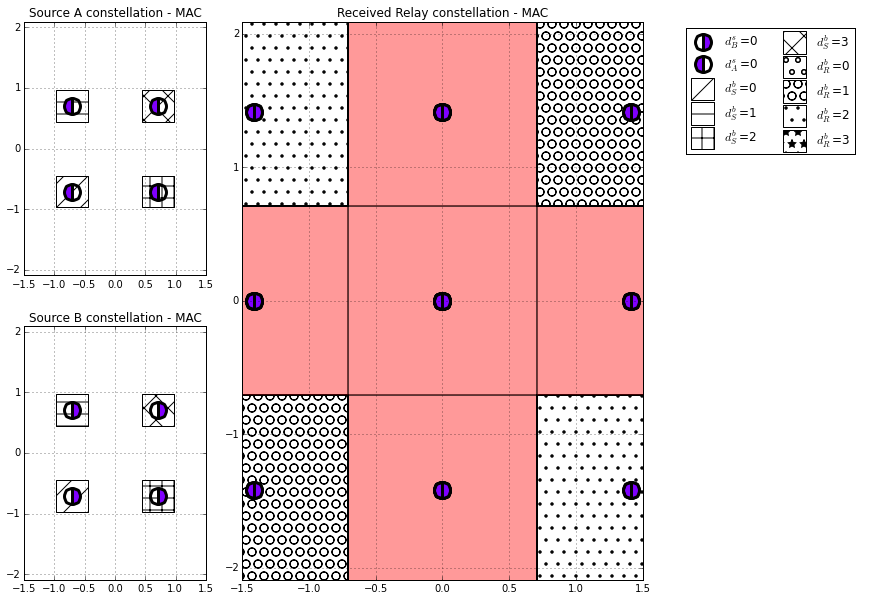

In [5]:
# Demonstration of exlusive law failure
h = 1j
draw_Constellations_S2R(Nb, Ns, h)

The exlusive law failure regions are filled by red color in our visualization. We again assign the received indecis to the relay supeimposed points to see that unambiguous mapping from the signal space to relay data is not possible for this relative rotation:

In [6]:
h = 1j # relative fading
(sA_const, sB_const, basic_part, superposed_part, relay_const, alpha) = \
            const_design_XOR(Nb, Ns, h)
un_const = unique_complex(relay_const) # make unique points:
for c in un_const[0]: # assign the basic stream indecis in the relay received constellation
    print [iA^iB for iA in range(2**Nb) for iB in range(2**Nb) \
          if np.abs(c-sA_const[iA]-h*sB_const[iB]) < 1e-5] , ':',c

[0, 3] : -1.41421356237j
[1] : (-1.41421356237-1.41421356237j)
[2, 1, 1, 2] : 0j
[3, 0] : (-1.41421356237+0j)
[3, 0] : 1.41421356237j
[2] : (-1.41421356237+1.41421356237j)
[2] : (1.41421356237-1.41421356237j)
[0, 3] : (1.41421356237+0j)
[1] : (1.41421356237+1.41421356237j)


Now, the relay cannot unambiguously decide about the relay data $d_R^b=d_A^b\oplus d_B^b$ even in the noise-less case.

The exclusive-law failure can be resolved by several approaches. Within this tutorial, we assume prerotation in sources requiring the feedback channel.

## Routing with the Constellation Design

Let check the constellation desing, when only the superposed stream is presented:\

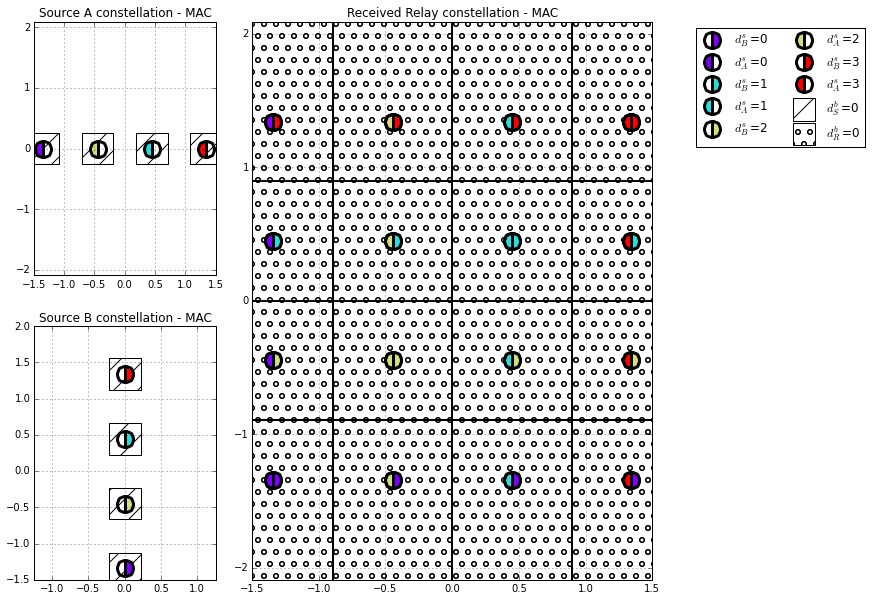

In [7]:
# Demonstration Superposed constellation design
Nb = 0
Ns = 2
h = 1.
draw_Constellations_S2R(Nb, Ns, h)

The received relay constellation recognizes 16 points (16-QAN), where joint decision ($d_A^s, d_B^s$) is possible. However, the prize for this ability to recognize both streams is <em>higher minimal distance</em> compared to the wireless network coding. 

The color of the right-half circle of the marker bolongs to the superposed source $B$ data and the color of the left-half one to superposed $A$ data.

## Superposed Constellation Design 

Since the side links are supposed to be the weakest links in the network, the basic stream is designed to be superposed in the higher power level than the superposed one (we remind, that the side link must support a reliable transmission of basic stream).

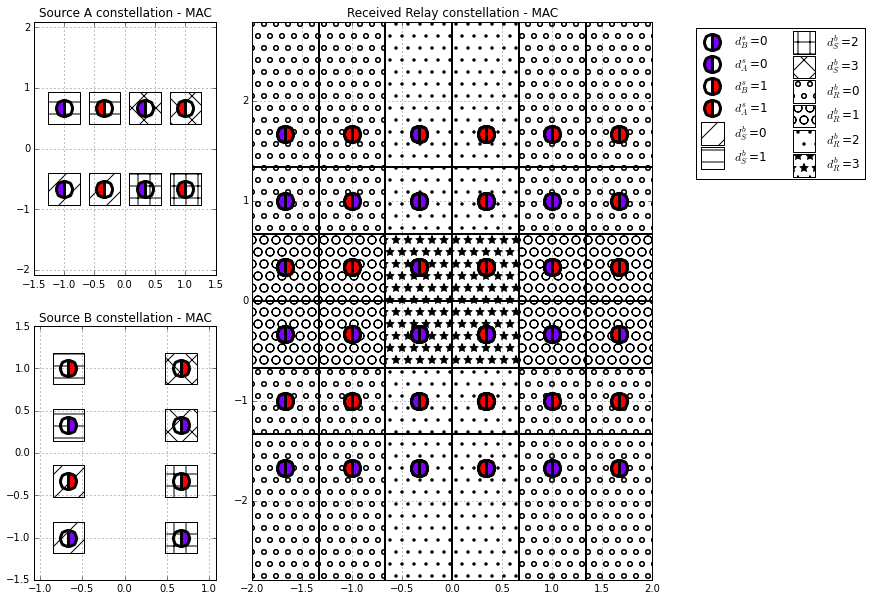

In [8]:
# Demonstration Superposed constellation design
Nb = 2
Ns = 1
h = 1.
draw_Constellations_S2R(Nb, Ns, h)

In addition to the basic relay data, one can ensure that the relay recognizes both streams $d_A^s$ and $d_B^s$ individually. 

##Visualization of all Constellations in WBN

For the sake of completness, we should also show all constellation that appear in the network. It is assumed that all receiving nodes perfectly know the fading coefficient so that the efficient received constellations in destinations are equal to AWGN channel.

Note that the relay uses conventional QAM($2^{N_b+2N_s}$) constellation for the BC stage.

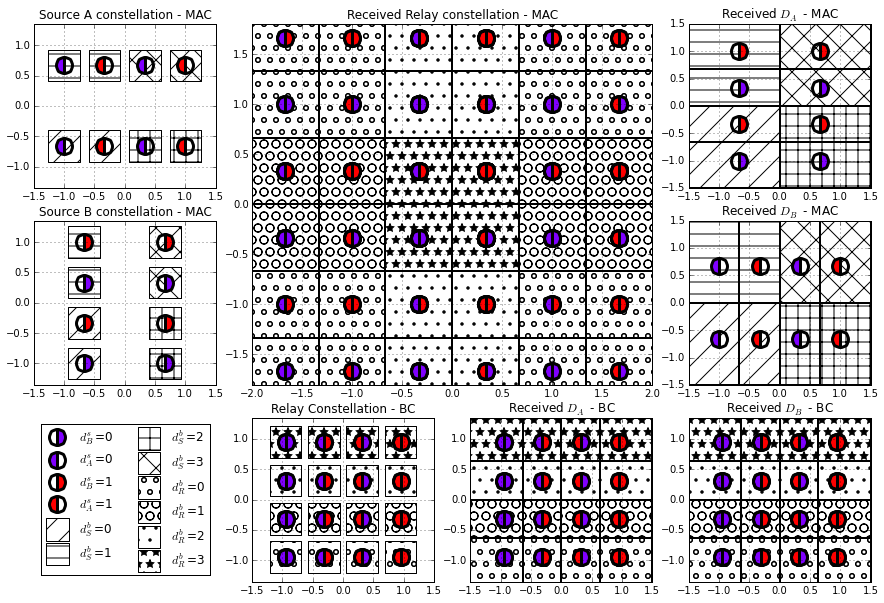

In [9]:
# Viewing all constellations within the network
from Constellation_Design_lib import draw_Constellations
draw_Constellations(Nb, Ns, h)

One can realize that the destinations receives the complementary superposed stream in both stages. This diversity can be utilized for substraction of the superposed stream received in BC stage from the received constellation in the MAC stage. After that, the destinations receive efficiently only the complementary basic parts in the in the MAC stage:

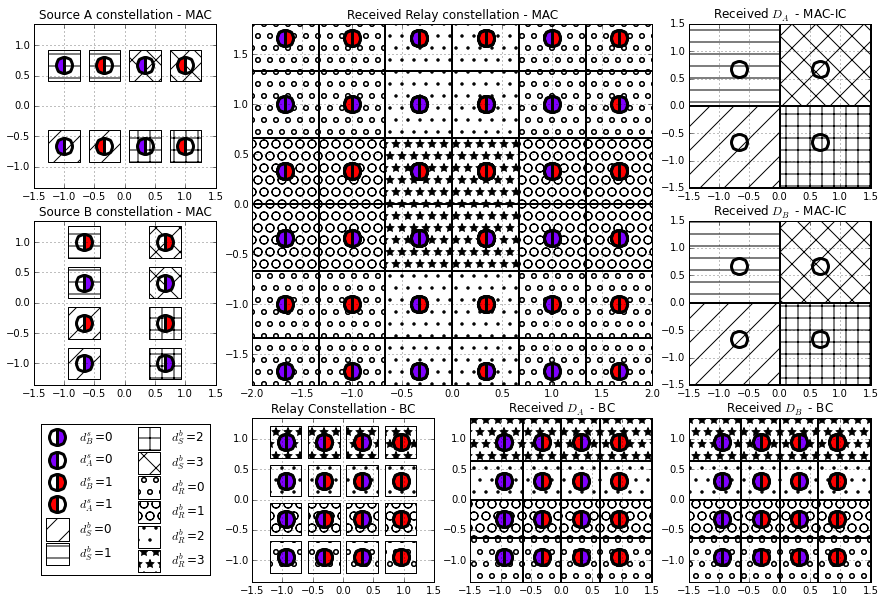

In [10]:
# Viewing all constellations within the network
from Constellation_Design_lib import draw_Constellations_IC
draw_Constellations_IC(Nb, Ns, h)

One can visually check the path of all streams through the network. Also both destinations have indeed all information they need to recover the desired data. Particularly, the superposed stream is directly available from relay and the basic stream is again recovered by network function (respective its inverse) of the complementary and relay basic streams.

##References